Objective: identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. 

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('letterdata.csv')
print(df.shape)
df.head()

(20000, 17)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


**Splitting the data**

In [3]:
X = np.array(df)[:, 1:16]
y = np.array(df)[:, 0]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the SVM model**

In [6]:
#gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications. 

from sklearn import svm

model = svm.SVC(gamma=0.025, C=3)

In [7]:
model.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [8]:
y_pred = model.predict(X_test)
y_pred

array(['T', 'L', 'A', ..., 'Q', 'Y', 'Y'], dtype=object)

In [9]:
model.score(X_test, y_test)

0.96475

In [10]:
# Comparing both columns of letters

y_grid = (np.column_stack([y_test, y_pred]))
y_grid

array([['T', 'T'],
       ['L', 'L'],
       ['A', 'A'],
       ...,
       ['Q', 'Q'],
       ['Y', 'Y'],
       ['Y', 'Y']], dtype=object)

In [13]:
import string 
lable = list(string.ascii_uppercase[0:26])
pred_lable = ['Predicted ' + s for s in lable] 

In [16]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=lable)

df_cm = pd.DataFrame(cm,
                     index= [i for i in lable],
                     columns= [i for i in pred_lable])

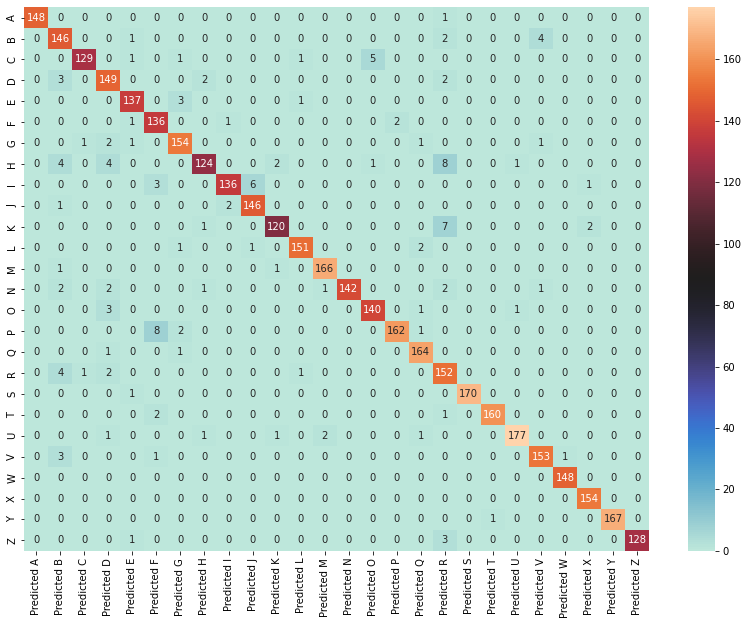

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='icefire')
plt.show()